In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'],columns = iris['feature_names'])
y = pd.DataFrame(iris['target'],columns=['target'])
iris_data = pd.concat([x,y],axis = 1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
target_name = {0:'setosa',1:'versicolor',2:'virginica'}

In [6]:
iris_data['target_name'] = iris_data['target'].map(target_name)

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [8]:
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]

In [9]:
iris_data.drop(['sepal width (cm)','petal width (cm)','target'],1,inplace=True)

In [10]:
target_class = {'setosa':1,'versicolor':-1}

In [11]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)

In [12]:
iris_data.drop('target_name',1,inplace=True)

In [13]:
iris_data

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
...,...,...,...
95,5.7,4.2,-1
96,5.7,4.2,-1
97,6.2,4.3,-1
98,5.1,3.0,-1


In [14]:
def sign(z):
    if z >0 :
        return 1
    else:
        return -1

iterator: 0
x: [1.  5.1 1.4]
w: [1.  5.1 1.4]


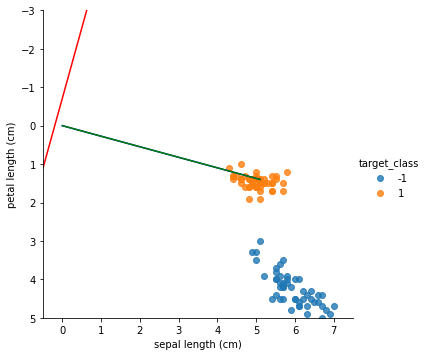

iterator: 1
x: [1.  7.  4.7]
w: [ 0.  -1.9 -3.3]


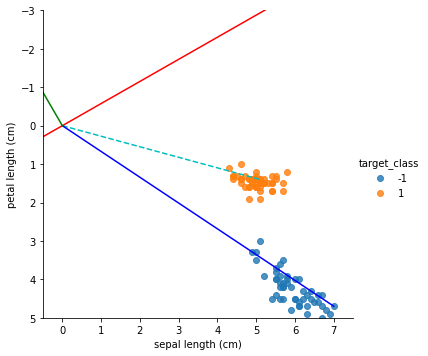

iterator: 2
x: [1.  5.1 1.4]
w: [ 1.   3.2 -1.9]


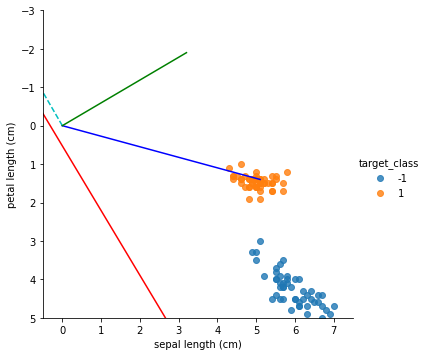

iterator: 3
x: [1.  7.  4.7]
w: [ 0.  -3.8 -6.6]


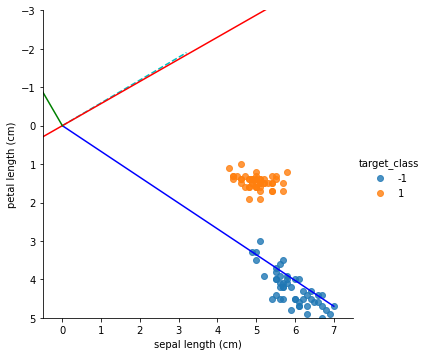

iterator: 4
x: [1.  5.1 1.4]
w: [ 1.   1.3 -5.2]


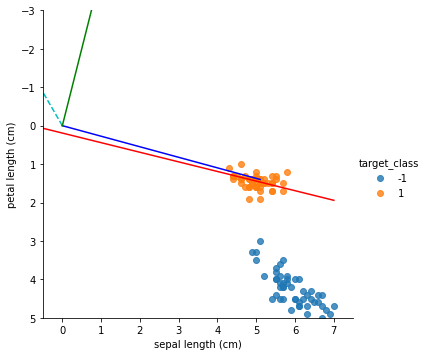

iterator: 5
x: [1.  4.6 1.5]
w: [ 2.   5.9 -3.7]


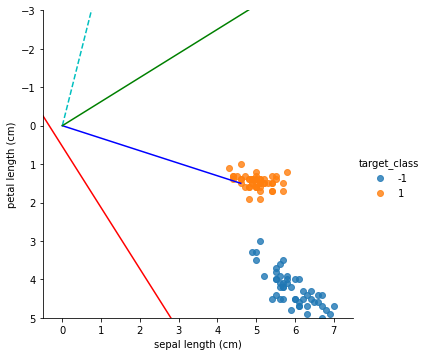

iterator: 6
x: [1.  7.  4.7]
w: [ 1.  -1.1 -8.4]


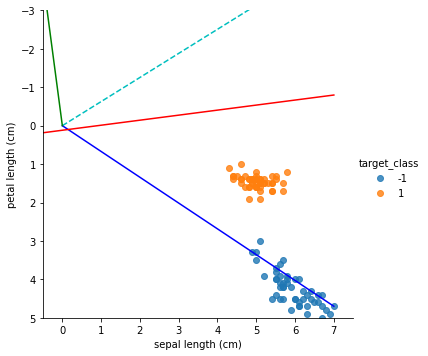

iterator: 7
x: [1.  5.1 1.4]
w: [ 2.  4. -7.]


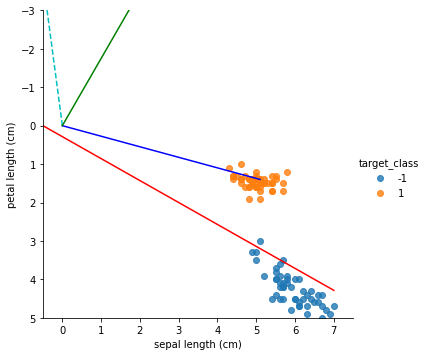

iterator: 8
x: [1.  5.7 3.5]
w: [  1.   -1.7 -10.5]


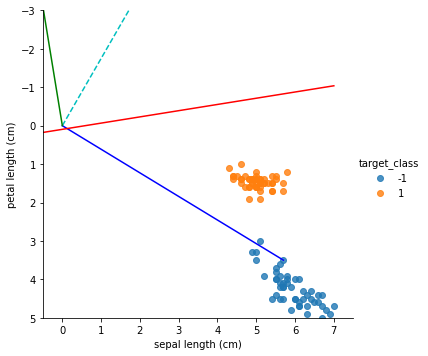

iterator: 9
x: [1.  5.1 1.4]
w: [ 2.   3.4 -9.1]


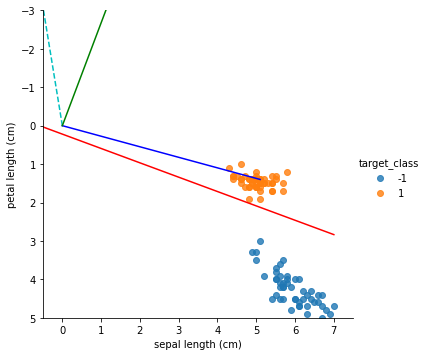

In [15]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[2]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            sns.lmplot('sepal length (cm)','petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')
            
            # 前一個Decision boundary 的法向量
            if w[1] != 0:
                x_last_decision_boundary = np.linspace(0,w[1])
                y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
                plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w))
            # x向量 
            x_vector = np.linspace(0,x[1])
            y_vector = (x[2]/x[1])*x_vector
            plt.plot(x_vector, y_vector,'b')
            # Decision boundary 的方向向量
            x_decision_boundary = np.linspace(-0.5,7)
            y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
            plt.plot(x_decision_boundary, y_decision_boundary,'r')
            # Decision boundary 的法向量
            x_decision_boundary_normal_vector = np.linspace(0,w[1])
            y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
            plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
            plt.xlim(-0.5,7.5)
            plt.ylim(5,-3)
            plt.show()